In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy import wcs
from astropy import units as u

In [11]:
image_3p6 = 'PAL5_data/PAL5__e1/PAL5__e1_3p6um.fits'
image_4p5 = 'PAL5_data/PAL5__e1/PAL5__e1_4p5um.fits'

hdr_3p6_list = fits.open(image_3p6)
hdr_3p6 = hdr_3p6_list[0].header
hdr_3p6_list.close()
data_3p6 = fits.getdata(image_3p6, ext = 0)

hdr_4p5_list = fits.open(image_4p5)
hdr_4p5 = hdr_4p5_list[0].header
hdr_4p5_list.close()
data_4p5 = fits.getdata(image_4p5, ext = 0)

In [12]:
file_3 = r'C:/Users/lukeb/Documents/MPhys_RRLs/output_files/aperphot_epoch1_3p6um.txt'
file_4 = r'C:/Users/lukeb/Documents/MPhys_RRLs/output_files/aperphot_epoch1_4p5um.txt'

f3 = ascii.read(file_3, delimiter = ',')
f4 = ascii.read(file_4, delimiter = ',')
print(f3)
print(f4)

 id      xcenter            ycenter          apparent_mag   
--- ------------------ ------------------ ------------------
  1  1335.720143020897 23.327156319119105                nan
  2 1017.0720463346273 24.456138934630374                nan
  3 1325.4233008232586 24.020858198156862                nan
  4 1267.5653109644136 27.531396027205712 17.188493864883704
  5 1138.3723108598422 28.990911636363123 16.848209928292306
  6 1300.2369547517922  29.59304179692155 16.491523044087106
  7  722.2239316998908 37.943258438011256                nan
  8  797.6394285408744  39.45556477253797                nan
  9  910.4856114937096  40.64482026688873 17.511316552353712
 10 1150.0528392801152  41.60175334170861 15.136903265073004
...                ...                ...                ...
587 1144.7378003870824  653.5186435069699                nan
588 186.06820051159417  654.7334220021861 18.169397190640368
589  1036.070774010111   653.706049999948                nan
590  980.1803416221136  

185


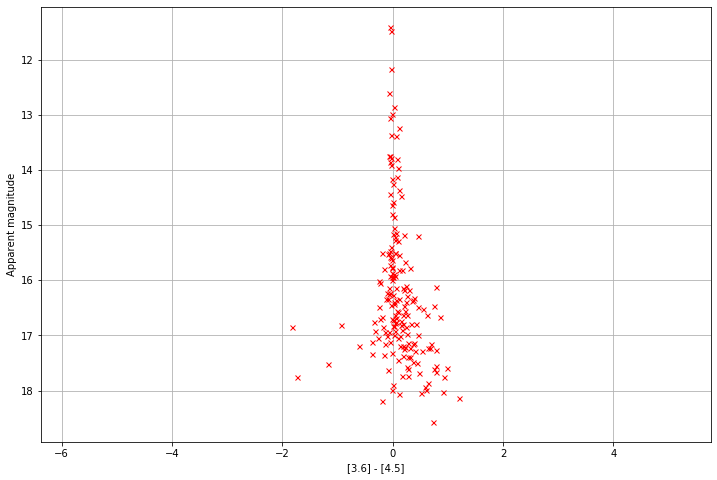

In [17]:
x_3 = f3['xcenter']
y_3 = f3['ycenter']
x_4 = f4['xcenter']
y_4 = f4['ycenter']

w3 = wcs.WCS(hdr_3p6)
w4 = wcs.WCS(hdr_4p5)

coord_3 = np.transpose((x_3, y_3))
coord_4 = np.transpose((x_4, y_4))
world_3 = w3.wcs_pix2world(coord_3, 0)
world_4 = w4.wcs_pix2world(coord_4, 0)

ra_3, dec_3 = world_3[:, 0], world_3[:, 1]
ra_4, dec_4 = world_4[:, 0], world_4[:, 1]

c_3 = SkyCoord(ra_3, dec_3, frame = 'icrs', unit = 'deg')
c_4 = SkyCoord(ra_4, dec_4, frame = 'icrs', unit = 'deg')

idx, d2d, d3d = c_4.match_to_catalog_sky(c_3)

# append new ra and dec coordinates to existing files
f3['ra'] = ra_3
f3['dec'] = dec_3
f4['ra'] = ra_4
f4['dec'] = dec_4

# following tutorial, must ensure any matches are significant
radius = 0.0001
selection = (d2d > radius*u.deg)
match_index = idx
match_index[selection] = -99.

matches = (match_index >= 0)

mag_3p6 = f3['apparent_mag'][match_index][matches]
mag_4p5 = f4['apparent_mag'][matches]
delta_mag = mag_3p6 - mag_4p5
print(len(delta_mag))

plt.plot(delta_mag, mag_3p6, 'rx', markersize = 5)
plt.xlabel('[3.6] - [4.5]')
plt.ylabel('Apparent magnitude')
plt.grid()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12, 8)
plt.show()